<a href="https://colab.research.google.com/github/Ilnurito/19-006/blob/main/%D0%B6%D0%B5%D0%BB%D1%82%D1%8B%D0%B9%20%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving попугай.jfif to попугай.jfif


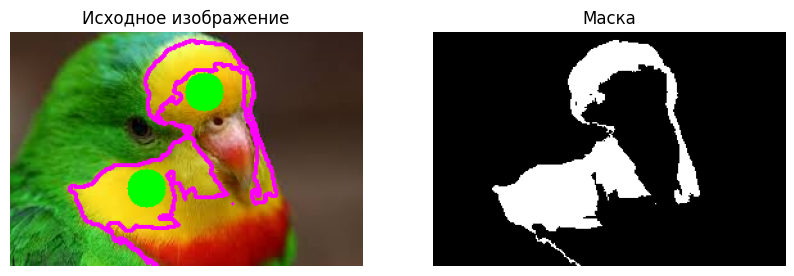

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

uploaded = files.upload()
# Получаем имя загруженного файла
image_path = next(iter(uploaded))
# Считываем кадр
frame = cv2.imread(image_path)
# Преобразуем в HSV
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Задаем пороги
low_yellow = np.array([25, 110, 110])
high_yellow = np.array([35, 255, 255])
mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(frame, contours, -1, (255,0,255), 2)
# Находим центр желтого объекта и рисуем точку
for contour in contours:
    if cv2.contourArea(contour) > 100:  # Игнорируем маленькие контуры
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Избегаем деления на ноль
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # Рисуем точку в центре
            cv2.circle(frame, (cX, cY), 15, (0, 255, 0), -1)  # Зеленая точка
# Выводим кадр
plt.figure(figsize=(10, 5)) # размер в дюймах
plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Маска')
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()